# Imports


In [63]:
import numpy as np # type: ignore
import pandas as pd # type: ignore
import matplotlib.pyplot as plt# type: ignore
import sys
import nnfs # type: ignore
import math as m
print("Numpy", np.__version__)
print("Pandas", pd.__version__)
print("Python", sys.version)

Numpy 1.26.4
Pandas 2.2.2
Python 3.11.8 (tags/v3.11.8:db85d51, Feb  6 2024, 22:03:32) [MSC v.1937 64 bit (AMD64)]


# Basic Neuron 🧠

In [4]:
inputs = [1.2, 5.1, 2.1] # 3 inputs are the three neurons from previous layer
weights= [3.1, 2.1, 8.7] # 3 weights are the weights of the three neurons from previous layer
bias = 3 # bias is the bias of the neuron from the previous layer

output = inputs[0]*weights[0] + inputs[1]*weights[1] + inputs[2]*weights[2] + bias  # output is the output of the neuron from the previous layer
print(output)

35.7


# Initiate a Layer 🥞

Four Inputs into Four Neurons

In [5]:
inputs = [1, 2, 3, 2.5] # 3 inputs are the four neurons from previous layer
weights= [0.2, 0.8, -0.5, 1.0] # 3 weights are the weights of the four neurons from previous layer
bias = 2 # bias is the bias of the neuron from the previous layer

output = inputs[0]*weights[0] + inputs[1]*weights[1] + inputs[2]*weights[2] + inputs[3]*weights[3]+ bias  # output is the output of the neuron from the previous layer
print(output)

4.8


Four Inputs into Three Neurons

In [6]:
inputs = [1, 2, 3, 2.5] # 4 inputs are the four neurons from previous layer

weights1= [0.2, 0.8, -0.5, 1.0] # 3 weights are the weights of the four neurons from previous layer
weights2= [0.5, -0.91, 0.26, -0.5]
weights3= [-0.26, -0.27, 0.17, 0.87]
bias1 = 2 # bias is the bias of the neuron from the previous layer
bias2 = 3
bias3 = 0.5

output = [inputs[0]*weights1[0] + inputs[1]*weights1[1] + inputs[2]*weights1[2] + inputs[3]*weights1[3]+ bias1, 
          inputs[0]*weights2[0] + inputs[1]*weights2[1] + inputs[2]*weights2[2] + inputs[3]*weights2[3]+ bias2,
          inputs[0]*weights3[0] + inputs[1]*weights3[1] + inputs[2]*weights3[2] + inputs[3]*weights3[3]+ bias3]  # output is the layered output of the neurons from the previous layer
print(output)

[4.8, 1.21, 2.385]


Simplifying the previous code

In [7]:
inputs = [1, 2, 3, 2.5] # 4 inputs are the four neurons from previous layer
weights= [[0.2, 0.8, -0.5, 1.0],
          [0.5, -0.91, 0.26, -0.5],
          [-0.26, -0.27, 0.17, 0.87]] # 3 weights are the weights of the four neurons from previous layer
biases = [2, 3, 0.5] # bias is the bias of the neuron from the previous layer

layer_outputs = [] # Output of current layer
for neuron_weights, neuron_bias in zip(weights, biases): #Zip is used to iterate over two lists at the same time and make a list of lists
    neuron_output = 0 # Output of given neuron
    for n_input, weight in zip(inputs, neuron_weights): #Zip is used to iterate over two lists at the same time
        neuron_output += n_input*weight # Multiply the input with the weight and add it to the neuron_output
    neuron_output += neuron_bias # Add the bias to the neuron_output
    layer_outputs.append(neuron_output) # Append the neuron_output to the layer_outputs

print(layer_outputs)

[4.8, 1.21, 2.385]


# Dot Product and Matrix Product 🔃

In [ ]:
inputs = [1, 2, 3, 2.5]
weights= [0.2, 0.8, -0.5, 1.0] # 3 weights are the weights of the four neurons from previous layer
bias = 2 # bias is the bias of the neuron from the previous layer

output = np.dot(weights, inputs) + bias # np.dot is used to multiply the weights and inputs and add them together
print(output)

4.8


In [ ]:
inputs = [1, 2, 3, 2.5] # 4 inputs are the four neurons from previous layer
weights= [[0.2, 0.8, -0.5, 1.0],
          [0.5, -0.91, 0.26, -0.5],
          [-0.26, -0.27, 0.17, 0.87]] # 3 weights are the weights of the four neurons from previous layer
biases = [2, 3, 0.5]

output = np.dot(weights, inputs) + biases # np.dot is used to multiply the weights and inputs and add them together
print(output)

[4.8   1.21  2.385]


# Batch Sizing 📦🔢

In [ ]:
inputs = [[1, 2, 3, 2.5],
          [2.0, 5.0, -1.0, 2.0],
          [-1.5, 2.7, 3.3, -0.8]] # inputs are the four neurons from previous layer(3,4)

weights= [[0.2, 0.8, -0.5, 1.0],
          [0.5, -0.91, 0.26, -0.5],
          [-0.26, -0.27, 0.17, 0.87]] # weights are the weights of the four neurons from previous layer(3,4)

biases = [2, 3, 0.5]

# output = np.dot(weights, inputs) + biases # np.dot is used to multiply the weights and inputs and add them together(3,4) * (3,4) = Error
output = np.dot(inputs, np.array(weights).T) + biases # np.dot is used to multiply the weights and inputs and add them together(3,4) * (4,3) = (3,3)
# T or Transpose is used to convert the weights from (3,4) to (4,3) to make the multiplication possible
print(output)

[[ 4.8    1.21   2.385]
 [ 8.9   -1.81   0.2  ]
 [ 1.41   1.051  0.026]]


MultiLayered Approach

In [17]:
inputs = [[1, 2, 3, 2.5],
          [2.0, 5.0, -1.0, 2.0],
          [-1.5, 2.7, 3.3, -0.8]] # inputs are the four neurons from previous layer(3,4)

weights= [[0.2, 0.8, -0.5, 1.0],
          [0.5, -0.91, 0.26, -0.5],
          [-0.26, -0.27, 0.17, 0.87]] # weights are the weights of the four neurons from previous layer(3,4)

weights2= [[0.1, -0.14, 0.5],
          [-0.5, 0.12, -0.33],
          [-0.44, 0.73, -0.13]]

biases = [2, 3, 0.5]

biases2 = [-1, 2, -0.5]

# output = np.dot(weights, inputs) + biases # np.dot is used to multiply the weights and inputs and add them together(3,4) * (3,4) = Error
layer1_outputs = np.dot(inputs, np.array(weights).T) + biases # np.dot is used to multiply the weights and inputs and add them together(3,4) * (4,3) = (3,3)
# T or Transpose is used to convert the weights from (3,4) to (4,3) to make the multiplication possible
layer2_outputs = np.dot(layer1_outputs, np.array(weights2).T) + biases2
print(layer2_outputs)

[[ 0.5031  -1.04185 -2.03875]
 [ 0.2434  -2.7332  -5.7633 ]
 [-0.99314  1.41254 -0.35655]]


# Objectification of the Layers 🛤️📚

In [ ]:
X = [[1, 2, 3, 2.5],
    [2.0, 5.0, -1.0, 2.0],
    [-1.5, 2.7, 3.3, -0.8]] # X denotes inputs

np.random.seed(0) # Seed is used to generate the same random numbers every time


class Layer_Dense: # Class for the dense layer- Hidden layer
    def __init__(self, n_inputs, n_neurons): #Entry point for the class object
        self.weights = 0.10 * np.random.randn(n_inputs, n_neurons) # Random weights of the neurons
        self.biases = np.zeros((1, n_neurons)) # Zero biases of the neurons
    def forward(self, inputs): # Forward function to calculate the output
        self.output = np.dot(inputs, self.weights) + self.biases # Output of the neurons

layer1 = Layer_Dense(4,5) # Layer 1 with 4 inputs and 5 neurons
layer2 = Layer_Dense(5,2) # Layer 2 with 5 inputs and 2 neurons
layer1.forward(X) # Forward function of layer 1
layer2.forward(layer1.output) # Forward function of layer 2


print("Layer 2 Output:",layer2.output) # Output of layer 1
# print(0.10*np.random.randn(4, 3)) # Random weights of the neurons

Layer 2 Output: [[ 0.148296   -0.08397602]
 [ 0.14100315 -0.01340469]
 [ 0.20124979 -0.07290616]]


# Activation Functions ⚡📈🧠

ReLU- Rectified Linear Unit  Activation Function

In [24]:
X = [[1, 2, 3, 2.5],
    [2.0, 5.0, -1.0, 2.0],
    [-1.5, 2.7, 3.3, -0.8]]

inputs = [0, 2, -1, 3.3, -2.7, 1.1, 2.2, -100] 

output= []

# for i in inputs:
#     if i > 0:
#         output.append(i)
#     elif i <= 0:
#         output.append(0)

for i in inputs:
    output.append(max(0, i))
    
print(output)

[0, 2, 0, 3.3, 0, 1.1, 2.2, 0]


In [ ]:
nnfs.init()#setting the random seed through nnfs

Dataset from nnfs

In [29]:
from nnfs.datasets import spiral_data # type: ignore
X, y = spiral_data(samples=100, classes=3)

In [30]:
class Layer_Dense: # Class for the dense layer- Hidden layer
    def __init__(self, n_inputs, n_neurons): #Entry point for the class object
        self.weights = 0.10 * np.random.randn(n_inputs, n_neurons) # Random weights of the neurons
        self.biases = np.zeros((1, n_neurons)) # Zero biases of the neurons
    def forward(self, inputs): # Forward function to calculate the output
        self.output = np.dot(inputs, self.weights) + self.biases # Output of the neurons

class Activation_ReLU: # Class for the ReLU activation function
    def forward(self, inputs): # Forward function to calculate the output
        self.output = np.maximum(0, inputs) # Output of the ReLU activation function

layer1 = Layer_Dense(2,5) # Layer 1 with 2 inputs and 5 neurons
activation1 = Activation_ReLU() # ReLU activation function object
layer1.forward(X) # Forward function of layer 1
activation1.forward(layer1.output) # Forward function of ReLU activation function
print(activation1.output)

[[0.         0.         0.         0.         0.        ]
 [0.         0.00027121 0.         0.00026233 0.        ]
 [0.         0.         0.         0.00029877 0.        ]
 ...
 [0.15903221 0.         0.1166153  0.         0.14184746]
 [0.16403008 0.         0.15140174 0.         0.14257608]
 [0.15084316 0.         0.0833516  0.         0.13780963]]


Softmax Activation Function

In [ ]:
layer_outputs = [4.8, 1.21, 2.385]
E = m.e # Euler's number 
exp_values = []
for output in layer_outputs:
    exp_values.append(E**output) # Exponential of the output

print(exp_values)

[121.51041751873483, 3.353484652549023, 10.859062664920513]


Normalization

In [41]:
norm_base = sum(exp_values) # Sum of the exponential values
norm_values = []
for value in exp_values:
    norm_values.append(value/norm_base) # Normalized values
print(norm_values)
print(sum(norm_values))

[0.8952826639572619, 0.024708306782099374, 0.0800090292606387]
0.9999999999999999


In [42]:
exp_values = np.exp(layer_outputs) # Exponential of the output
norm_values = exp_values / np.sum(exp_values) # Normalized values
print(norm_values)

[0.89528266 0.02470831 0.08000903]


SoftMax= Input -> Exponentiate -> Normalize -> Output

In [47]:
layer_outputs = [[4.8, 1.21, 2.385],
                [8.9, -1.81, 0.2],
                [1.41, 1.051, 0.026]]
exp_values = np.exp(layer_outputs)
norm_values = exp_values / np.sum(exp_values, axis=1, keepdims=True) # Normalized values
print(norm_values)

[[8.95282664e-01 2.47083068e-02 8.00090293e-02]
 [9.99811129e-01 2.23163963e-05 1.66554348e-04]
 [5.13097164e-01 3.58333899e-01 1.28568936e-01]]


Softmax Activation Class

In [49]:
class Layer_Dense: # Class for the dense layer- Hidden layer
    def __init__(self, n_inputs, n_neurons): #Entry point for the class object
        self.weights = 0.10 * np.random.randn(n_inputs, n_neurons) # Random weights of the neurons
        self.biases = np.zeros((1, n_neurons)) # Zero biases of the neurons
    def forward(self, inputs): # Forward function to calculate the output
        self.output = np.dot(inputs, self.weights) + self.biases # Output of the neurons

class Activation_ReLU: # Class for the ReLU activation function
    def forward(self, inputs): # Forward function to calculate the output
        self.output = np.maximum(0, inputs) # Output of the ReLU activation function

class Activation_Softmax: # Class for the Softmax activation function
    def forward(self, inputs): # Forward function to calculate the output
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True)) # Exponential of the output
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True) # Normalized values
        self.output = probabilities

X, y = spiral_data(samples=100, classes=3) # Spiral data

dense1 = Layer_Dense(2,3) # Layer 1 with 2 inputs and 3 neurons
activation1 = Activation_ReLU() # ReLU activation function object

dense2 = Layer_Dense(3,3) # Layer 2 with 3 inputs and 3 neurons
activation2 = Activation_Softmax() # Softmax activation function object

dense1.forward(X) # Forward function of layer 1
activation1.forward(dense1.output) # Forward function of ReLU activation function  

dense2.forward(activation1.output) # Forward function of layer 2
activation2.forward(dense2.output) # Forward function of Softmax activation function

print(activation2.output[:5])

[[0.33333334 0.33333334 0.33333334]
 [0.33335057 0.33332202 0.33332744]
 [0.3333651  0.3333086  0.33332625]
 [0.33336136 0.3332889  0.3333498 ]
 [0.33331835 0.33321413 0.3334675 ]]


# Calculating Loss with Categorical Cross-Entropy 🧮🎯📉

Logarithm

In [50]:
b= 5.2
print(np.log(b)) # Natural logarithm

1.6486586255873816


In [51]:
m.e ** 1.6486586255873816 # Euler's number raised to the power of the natural logarithm of 5.2

5.199999999999999

Categorical Cross Entropy

In [53]:
softmax_output = [0.7, 0.1, 0.2] # Softmax output
target_output = [1, 0, 0] # Target output

Loss = -(m.log(softmax_output[0])*target_output[0] + 
         m.log(softmax_output[1])*target_output[1] + 
         m.log(softmax_output[2])*target_output[2]) # Loss function

print(Loss)

0.35667494393873245


In [55]:
loss = -m.log(softmax_output[0]) # Loss function
print(loss)

0.35667494393873245


Implementing Loss

In [57]:
softmax_outputs = np.array([[0.7, 0.1, 0.2],
                            [0.1, 0.5, 0.4],
                            [0.02, 0.9, 0.08]]) # Softmax output
class_targets = [0, 1, 1] # Target output
print(-np.log(softmax_outputs[[0,1,2], class_targets])) # Loss function

[0.35667494 0.69314718 0.10536052]


In [58]:
class Layer_Dense: # Class for the dense layer- Hidden layer
    def __init__(self, n_inputs, n_neurons): #Entry point for the class object
        self.weights = 0.10 * np.random.randn(n_inputs, n_neurons) # Random weights of the neurons
        self.biases = np.zeros((1, n_neurons)) # Zero biases of the neurons
    def forward(self, inputs): # Forward function to calculate the output
        self.output = np.dot(inputs, self.weights) + self.biases # Output of the neurons

class Activation_ReLU: # Class for the ReLU activation function
    def forward(self, inputs): # Forward function to calculate the output
        self.output = np.maximum(0, inputs) # Output of the ReLU activation function

class Activation_Softmax: # Class for the Softmax activation function
    def forward(self, inputs): # Forward function to calculate the output
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True)) # Exponential of the output
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True) # Normalized values
        self.output = probabilities

class Loss: # Class for the loss function
    def calculate(self, output, y): # Calculate function to calculate the loss
        sample_losses = self.forward(output, y) # Forward function of the loss function
        data_loss = np.mean(sample_losses) # Mean of the sample losses
        return data_loss

class Loss_CategoricalCrossentropy(Loss): # Class for the Categorical Crossentropy loss function
    def forward(self, y_pred, y_true): # Forward function to calculate the loss
        samples = len(y_pred) # Number of samples
        y_pred_clipped = np.clip(y_pred, 1e-7, 1-1e-7) # Clip the values to avoid log(0)

        if len(y_true.shape) == 1: # One-hot encoded
            correct_confidences = y_pred_clipped[range(samples), y_true] # Correct confidences

        elif len(y_true.shape) == 2: # Targets are one-hot encoded
            correct_confidences = np.sum(y_pred_clipped*y_true, axis=1) # Correct confidences

        negative_log_likelihoods = -np.log(correct_confidences) # Negative log likelihoods
        return negative_log_likelihoods    

X, y = spiral_data(samples=100, classes=3) # Spiral data

dense1 = Layer_Dense(2,3) # Layer 1 with 2 inputs and 3 neurons
activation1 = Activation_ReLU() # ReLU activation function object

dense2 = Layer_Dense(3,3) # Layer 2 with 3 inputs and 3 neurons
activation2 = Activation_Softmax() # Softmax activation function object

dense1.forward(X) # Forward function of layer 1
activation1.forward(dense1.output) # Forward function of ReLU activation function  

dense2.forward(activation1.output) # Forward function of layer 2
activation2.forward(dense2.output) # Forward function of Softmax activation function

loss_function = Loss_CategoricalCrossentropy() # Categorical Crossentropy loss function object
loss = loss_function.calculate(activation2.output, y) # Calculate the loss  

print("Loss:", loss)

Loss: 1.098608


# Optimization 🚀📈🔧

nnfs Vertical Data Dataset

In [ ]:
from nnfs.datasets import vertical_data, spiral_data
nnfs.init() # type: ignore

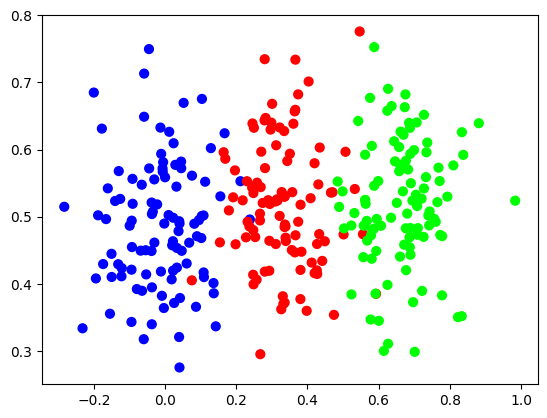

In [ ]:
X, y = vertical_data(samples=100, classes=3) # Vertical data

plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap='brg') # Scatter plot of the data
plt.show()

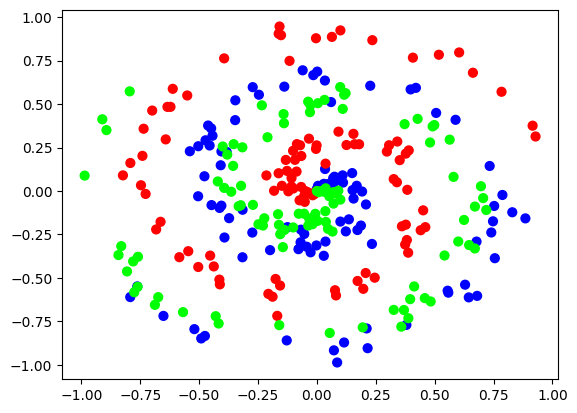

In [66]:
X, y = spiral_data(samples=100, classes=3) # Vertical data

plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap='brg') # Scatter plot of the data
plt.show()

Model

In [67]:
dense1 = Layer_Dense(2,3) # Layer 1 with 2 inputs and 3 neurons
activation1 = Activation_ReLU() # ReLU activation function object

dense2 = Layer_Dense(3,3) # Layer 2 with 3 inputs and 3 neurons
activation2 = Activation_Softmax() # Softmax activation function object

loss_function = Loss_CategoricalCrossentropy() # Categorical Crossentropy loss function object

lowest_loss = 9999999 # Lowest loss
best_dense1_weights = dense1.weights.copy() # Best weights of layer 1
best_dense1_biases = dense1.biases.copy() # Best biases of layer 1
best_dense2_weights = dense2.weights.copy() # Best weights of layer 2
best_dense2_biases = dense2.biases.copy() # Best biases of layer 2

for iteration in range(10000): # 10000 iterations  
    dense1.weights += 0.05 * np.random.randn(2,3) # Random weights of layer 1
    dense1.biases += 0.05 * np.random.randn(1,3) # Random biases of layer 1 
    dense2.weights += 0.05 * np.random.randn(3,3) # Random weights of layer 2
    dense2.biases += 0.05 * np.random.randn(1,3) # Random biases of layer 2

    dense1.forward(X) # Forward function of layer 1
    activation1.forward(dense1.output) # Forward function of ReLU activation function
    dense2.forward(activation1.output) # Forward function of layer 2
    activation2.forward(dense2.output) # Forward function of Softmax activation function

    loss = loss_function.calculate(activation2.output, y) # Calculate the loss
    predictions = np.argmax(activation2.output, axis=1) # Predictions
    accuracy = np.mean(predictions==y) # Accuracy

    if loss < lowest_loss: # If the loss is lower than the lowest loss
        print('New set of weights found, iteration:', iteration,
              'Loss:', loss,
              'Accuracy:', accuracy)
        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases = dense1.biases.copy()
        best_dense2_weights = dense2.weights.copy()
        best_dense2_biases = dense2.biases.copy()
        lowest_loss = loss
    else:
        dense1.weights = best_dense1_weights.copy()
        dense1.biases = best_dense1_biases.copy()
        dense2.weights = best_dense2_weights.copy()
        dense2.biases = best_dense2_biases.copy()


New set of weights found, iteration: 0 Loss: 1.099799 Accuracy: 0.3433333333333333
New set of weights found, iteration: 1 Loss: 1.0993555 Accuracy: 0.31
New set of weights found, iteration: 13 Loss: 1.099352 Accuracy: 0.31
New set of weights found, iteration: 14 Loss: 1.0991111 Accuracy: 0.32
New set of weights found, iteration: 17 Loss: 1.0988011 Accuracy: 0.3333333333333333
New set of weights found, iteration: 20 Loss: 1.0986973 Accuracy: 0.31666666666666665
New set of weights found, iteration: 22 Loss: 1.0985897 Accuracy: 0.34
New set of weights found, iteration: 35 Loss: 1.0983558 Accuracy: 0.3333333333333333
New set of weights found, iteration: 37 Loss: 1.0979116 Accuracy: 0.3333333333333333
New set of weights found, iteration: 45 Loss: 1.0978814 Accuracy: 0.3333333333333333
New set of weights found, iteration: 47 Loss: 1.0976487 Accuracy: 0.37333333333333335
New set of weights found, iteration: 48 Loss: 1.0972036 Accuracy: 0.35333333333333333
New set of weights found, iteration: 